In [22]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


### Identify and laod the Nba networkdataset

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/Kingtilon1/DATA620/main/NBA_network.csv', header = None)
print(df.head)

<bound method NDFrame.head of                      0                1     2             3       4
0          Blazers2018   Damian Lillard  2018       Blazers  Player
1          Blazers2018      CJ McCollum  2018       Blazers  Player
2          Blazers2018     Jusuf Nurkic  2018       Blazers  Player
3          Blazers2018  Al-Farouq Aminu  2018       Blazers  Player
4          Blazers2018       Seth Curry  2018       Blazers  Player
...                ...              ...   ...           ...     ...
2451  Timberwolves2009     Corey Brewer  2009  Timberwolves  Player
2452  Timberwolves2009  Wayne Ellington  2009  Timberwolves  Player
2453      Warriors2009    Stephen Curry  2009      Warriors  Player
2454       Wizards2009       Nick Young  2009       Wizards  Player
2455       Wizards2009     JaVale McGee  2009       Wizards  Player

[2456 rows x 5 columns]>


### Assign column names to the table

In [24]:
df.columns = ['Team/Year', 'Player_Name', 'Year', 'Team', 'Person_Type']

print(df.head())

     Team/Year      Player_Name  Year     Team Person_Type
0  Blazers2018   Damian Lillard  2018  Blazers      Player
1  Blazers2018      CJ McCollum  2018  Blazers      Player
2  Blazers2018     Jusuf Nurkic  2018  Blazers      Player
3  Blazers2018  Al-Farouq Aminu  2018  Blazers      Player
4  Blazers2018       Seth Curry  2018  Blazers      Player


### Visualize the data as a graph

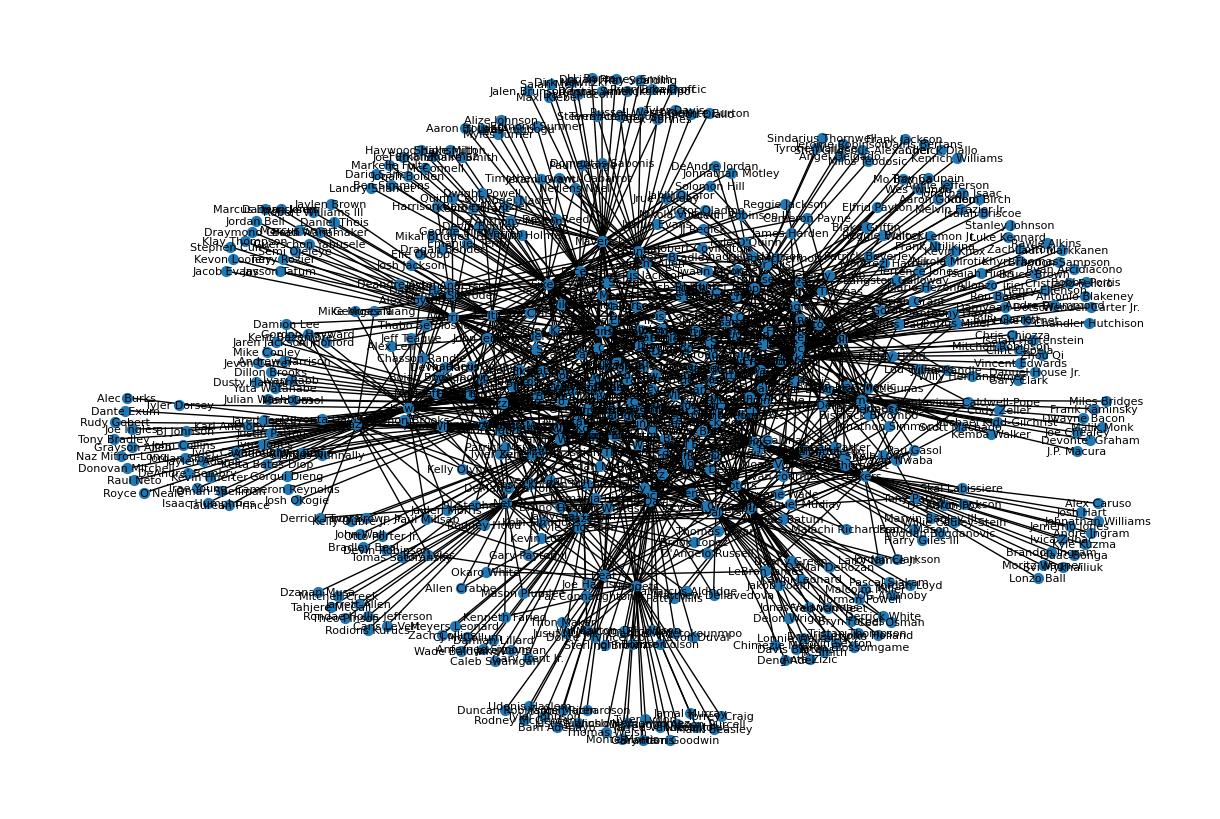

In [25]:
G = nx.from_pandas_edgelist(df, source='Team', target='Player_Name')

plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=50, font_size=8)
plt.show()

### Now using a degree threshold, Nodes with a degree less than the thereshold will be removed to reduce Network Size

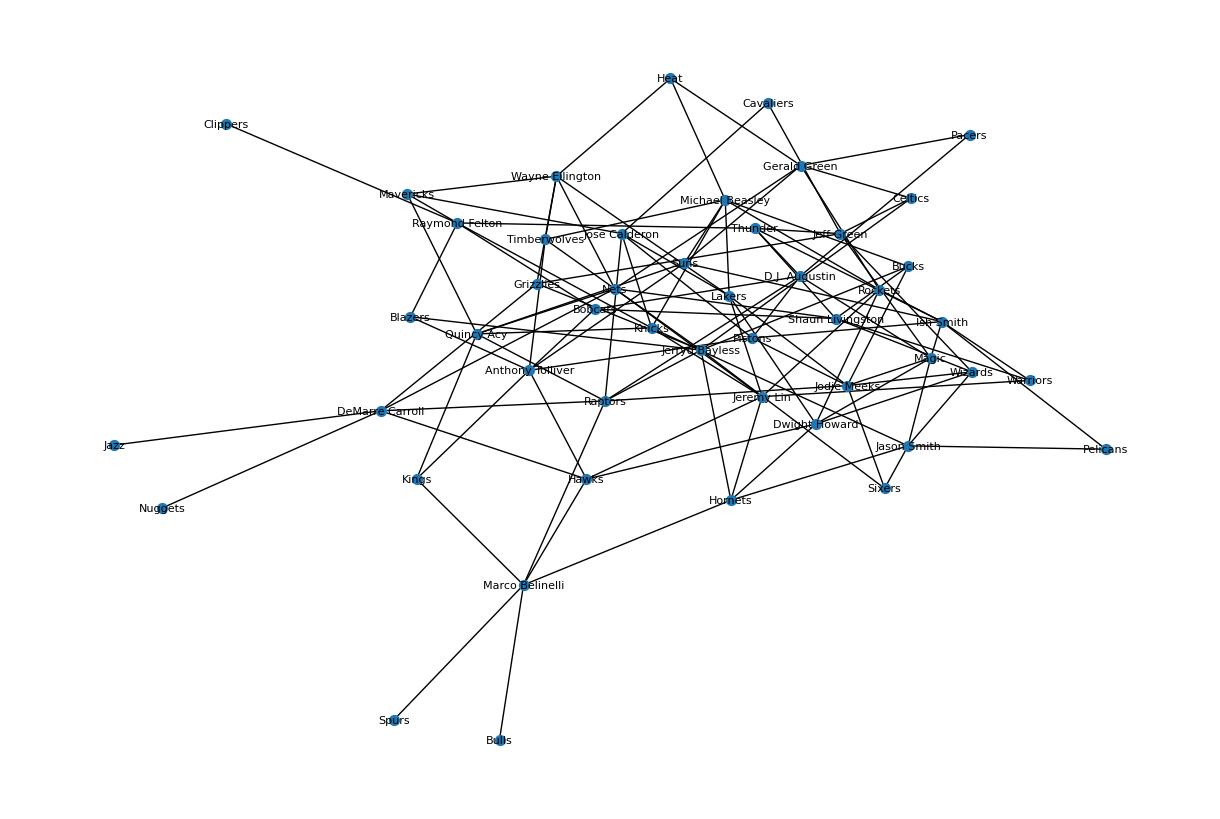

In [26]:
# Set a threshold for degree
degree_threshold = 5

# Filter nodes based on degree
nodes_to_keep = [node for node, degree in dict(G.degree()).items() if degree > degree_threshold]
G_reduced = G.subgraph(nodes_to_keep)

# Draw the reduced network
plt.figure(figsize=(12, 8))
nx.draw(G_reduced, with_labels=True, node_size=50, font_size=8)
plt.show()

### Compute centrality measures

In [27]:
degree_centrality = nx.degree_centrality(G_reduced)
degree_centrality_sorted = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)

degree_centrality_sorted[:10]

[('Jerryd Bayless', 0.16666666666666666),
 ('Anthony Tolliver', 0.14583333333333331),
 ('Michael Beasley', 0.14583333333333331),
 ('Ish Smith', 0.14583333333333331),
 ('Raptors', 0.14583333333333331),
 ('Jodie Meeks', 0.14583333333333331),
 ('Jeremy Lin', 0.14583333333333331),
 ('D.J. Augustin', 0.125),
 ('Dwight Howard', 0.125),
 ('DeMarre Carroll', 0.125)]

### Degree Centrality Analysis

The degree centrality of a node in a network measures the number of connections it has to other nodes. In the context of this dataset, a higher degree centrality indicates a player or a team that has more connections within the network.

The top 10 nodes by degree centrality are as follows:

1. **Jerryd Bayless**: 0.1667
2. **Anthony Tolliver**: 0.1458
3. **Michael Beasley**: 0.1458
4. **Ish Smith**: 0.1458
5. **Raptors**: 0.1458
6. **Jodie Meeks**: 0.1458
7. **Jeremy Lin**: 0.1458
8. **D.J. Augustin**: 0.1250
9. **Dwight Howard**: 0.1250
10. **DeMarre Carroll**: 0.1250

#### Interpretation

- **Jerryd Bayless** has the highest degree centrality in the reduced network, indicating that he has the most connections to other nodes (players and teams) in the dataset.
- **Players like Anthony Tolliver, Michael Beasley, and Ish Smith** also show high degree centrality values, suggesting they are key players with numerous connections.
- **The Raptors** team appears among the top nodes by degree centrality, highlighting their significant presence and connectivity within the network.
- This analysis helps identify the most connected players and teams, which can be critical for understanding the structure and key influencers in the network.

The degree centrality values provide insights into the importance and influence of nodes within the network. Players and teams with high degree centrality are likely to play pivotal roles in bridging different parts of the network, facilitating interactions, and maintaining the overall connectivity of the network.


### Computing Betweenned Centrality

In [28]:
betweenness_centrality = nx.betweenness_centrality(G_reduced)
betweenness_centrality_sorted = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)

betweenness_centrality_sorted[:10]

[('Raptors', 0.12198509139225308),
 ('DeMarre Carroll', 0.09957255849146848),
 ('Marco Belinelli', 0.09778648299071717),
 ('Jerryd Bayless', 0.09042398793429088),
 ('Raymond Felton', 0.06795213098276977),
 ('Anthony Tolliver', 0.06786331629522356),
 ('Nets', 0.06640581497107695),
 ('Jeremy Lin', 0.06252826238966816),
 ('Knicks', 0.06228584569433545),
 ('Ish Smith', 0.057506911632716706)]

### Betweenness Centrality Analysis

Betweenness centrality measures the extent to which a node lies on the shortest paths between other nodes in the network. Nodes with high betweenness centrality can control information flow within the network, acting as bridges between different parts of the network.

The top 10 nodes by betweenness centrality are as follows:

1. **Raptors**: 0.1220
2. **DeMarre Carroll**: 0.0996
3. **Marco Belinelli**: 0.0978
4. **Jerryd Bayless**: 0.0904
5. **Raymond Felton**: 0.0680
6. **Anthony Tolliver**: 0.0679
7. **Nets**: 0.0664
8. **Jeremy Lin**: 0.0625
9. **Knicks**: 0.0623
10. **Ish Smith**: 0.0575

#### Interpretation

- **Raptors** team has the highest betweenness centrality, indicating that they are a crucial bridge within the network, facilitating connections between various players and teams.
- **DeMarre Carroll and Marco Belinelli** show significant betweenness centrality, suggesting their roles as important intermediaries in the network.
- **Jerryd Bayless**, who also had high degree centrality, is key in connecting different parts of the network, emphasizing his overall importance.
- **Teams like Nets and Knicks** are among the top nodes by betweenness centrality, highlighting their


### Implementing the Island Method

In this section, we will implement the island method to reduce the network size by focusing on the most significant connections. The steps include:

1. **Calculate Edge Weights**: Use degree centrality as a proxy for edge weights.
2. **Filter Edges by Threshold**: Keep edges with weights above a certain threshold.
3. **Visualize the Reduced Network**: Plot the reduced network.
4. **Visualize Edge Weight Distribution**: Create a bar graph of the remaining edges' weights.

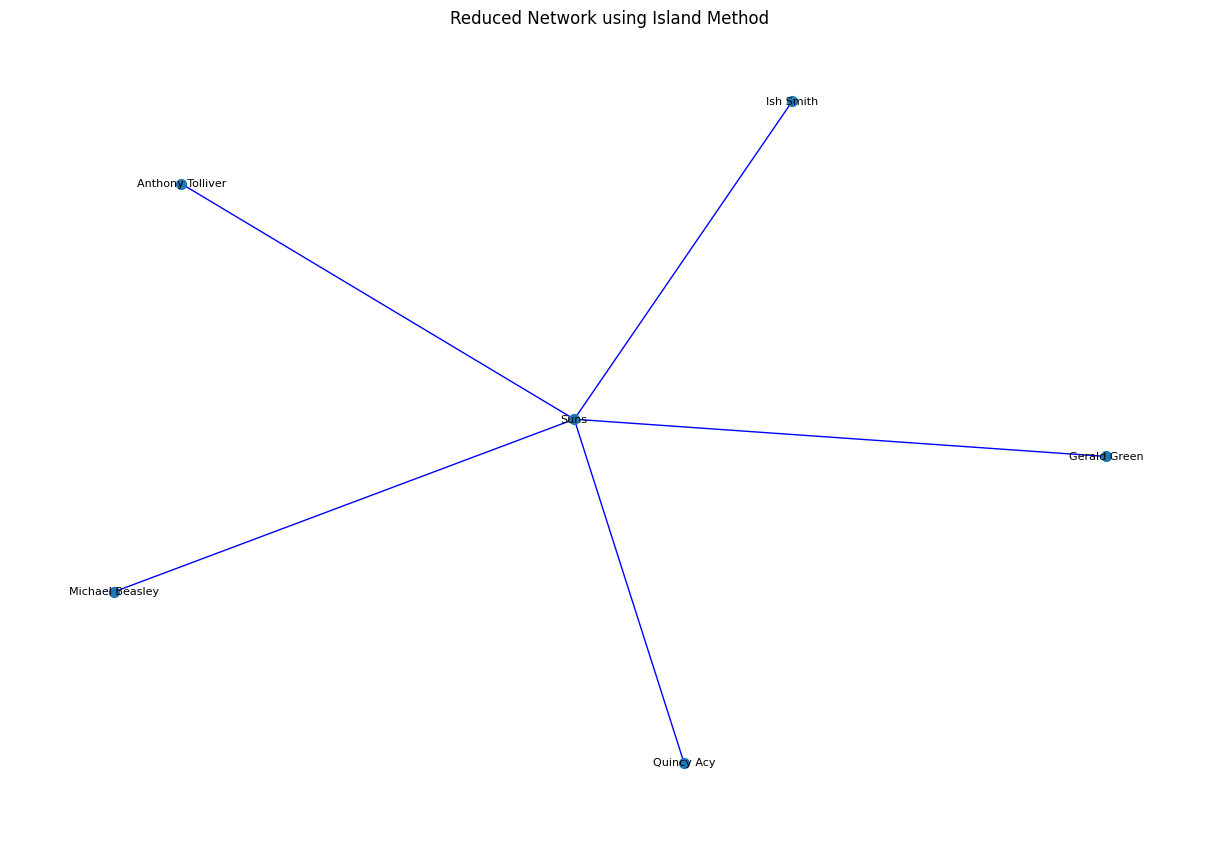

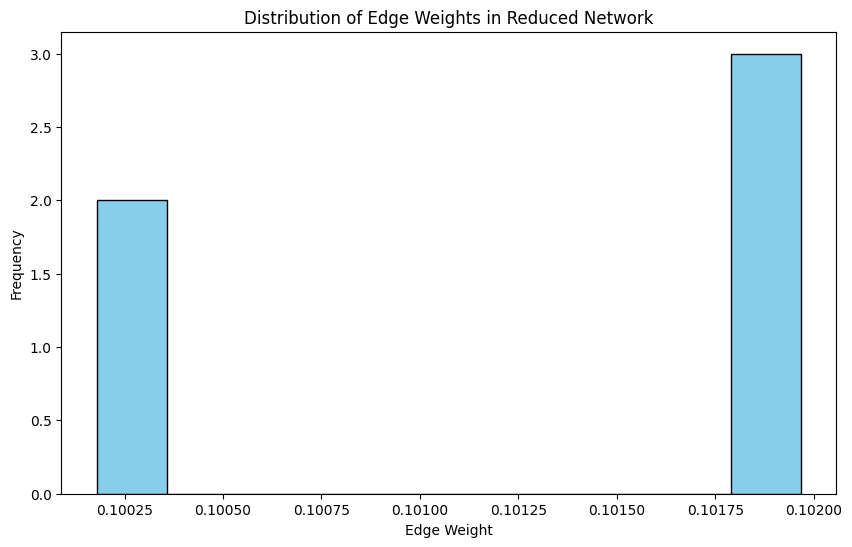

In [29]:
weights = nx.degree_centrality(G)

# Add edge weights to the graph
for u, v in G.edges():
    G[u][v]['weight'] = weights[u] + weights[v]

#Filter edges by a threshold of 0.1
threshold = 0.1  
edges_to_keep = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] > threshold]
G_island = G.edge_subgraph(edges_to_keep)

#Visualize the reduced network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_island)
nx.draw(G_island, pos, with_labels=True, node_size=50, font_size=8, edge_color='blue')
plt.title("Reduced Network using Island Method")
plt.show()

#Bar Graph of Remaining Edges
edge_weights = [d['weight'] for u, v, d in G_island.edges(data=True)]
plt.figure(figsize=(10, 6))
plt.hist(edge_weights, bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Edge Weights in Reduced Network")
plt.xlabel("Edge Weight")
plt.ylabel("Frequency")
plt.show()

### Reduced Network Visualization

The graph above shows the reduced network after applying the island method. Nodes represent teams and players, while edges represent significant connections between them. The visualization highlights key nodes and their relationships, focusing on the most important connections within the network.

### Edge Weight Distribution

The bar graph also shows the distribution of edge weights in the reduced network. The x-axis represents the range of edge weights, and the y-axis shows the frequency of edges within each weight range. This helps to understand the weight of the remaining connections and their significance in the reduced network.